<a href="https://colab.research.google.com/github/ValeriaMendezC/Repositorio/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3rd Project


# Importación de librerías y Carga de datos

In [308]:
!pip install wooldridge
import wooldridge as wd
import pandas as pd
import numpy as np
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_1.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exploración inicial

In [309]:
data.head()

,user_id,gender,wage,purchased,birth_day
0,217,Female,NaN,0,1983-08-06
1,226,Female,146500.0,1,1972-01-28
2,697,Male,NaN,1,1981-12-12
3,743,Female,NaN,0,1983-05-26
4,63,Female,140500.0,1,1967-11-02


In [310]:
data.tail()

,user_id,gender,wage,purchased,birth_day
1169,636,Male,76500.0,0,1970-08-26
1170,320,Female,143500.0,1,1970-04-07
1171,136,Female,NaN,1,1968-12-28
1172,721,Male,148000.0,1,1993-11-23
1173,471,man,60500.0,0,1984-06-02


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    1174 non-null   int64  
 1   gender     1174 non-null   object 
 2   wage       930 non-null    float64
 3   purchased  1174 non-null   int64  
 4   birth_day  1174 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.0+ KB


In [312]:
data.describe()

,user_id,wage,purchased
count,1174.000000,930.000000,1174.000000
mean,499.988927,71948.387097,0.404600
std,287.648865,34112.616989,0.491024
min,1.000000,15000.000000,0.000000
25%,252.250000,45500.000000,0.000000
50%,499.500000,71250.000000,0.000000
75%,749.750000,89500.000000,1.000000
max,1000.000000,152500.000000,1.000000


In [313]:
#La variable salario presenta un sesgo positivo ya que la media es mas grande que la mediana

In [314]:
data.nunique()

user_id      1000
gender          4
wage          234
purchased       2
birth_day     964
dtype: int64

# Revisión de duplicados 


In [315]:
data.duplicated().sum()

174

In [316]:
data=data.drop_duplicates().reset_index(drop=True)

In [317]:
#La base de datos se reduce en 174 

# Transformación de tipos de datos

In [318]:
data.columns

Index(['user_id', 'gender', 'wage', 'purchased', 'birth_day'], dtype='object')

In [319]:
data.rename(columns={"user_id":"id"}, inplace=True)

In [320]:
data["gender"]

0      Female
1      Female
2        Male
3      Female
4      Female
        ...  
995    Female
996      Male
997    Female
998      Male
999       man
Name: gender, Length: 1000, dtype: object

In [321]:
data.replace({"gender":{"man":"Male","woman":"Female"}},inplace=True)

In [322]:
data.nunique()

id           1000
gender          2
wage          234
purchased       2
birth_day     964
dtype: int64

In [323]:
#Inicialmente habían cuatro tipos de datos en la variable genero que pasan a ser dos luego de la transformación de tipos de datos 

# Enriquecimiento del dataset

In [324]:
data['birth_day']

0      1983-08-06
1      1972-01-28
2      1981-12-12
3      1983-05-26
4      1967-11-02
          ...    
995    1969-03-09
996    1970-08-26
997    1970-04-07
998    1993-11-23
999    1984-06-02
Name: birth_day, Length: 1000, dtype: object

In [325]:
birth_date = pd.to_datetime(data["birth_day"],format= '%Y-%m-%d')

In [326]:
hoy=pd.to_datetime("2022-08-31",format= '%Y-%m-%d')

In [327]:
hoy.year-birth_date.dt.year

0      39
1      50
2      41
3      39
4      55
       ..
995    53
996    52
997    52
998    29
999    38
Name: birth_day, Length: 1000, dtype: int64

In [328]:
data["edad"]=(pd.Series(hoy, index=birth_date.index) - birth_date).astype('timedelta64[Y]')

In [329]:
data["edad"]

0      39.0
1      50.0
2      40.0
3      39.0
4      54.0
       ... 
995    53.0
996    52.0
997    52.0
998    28.0
999    38.0
Name: edad, Length: 1000, dtype: float64

In [330]:
data.tail()

,id,gender,wage,purchased,birth_day,edad
995,305,Female,22500.0,1,1969-03-09,53.0
996,636,Male,76500.0,0,1970-08-26,52.0
997,320,Female,143500.0,1,1970-04-07,52.0
998,721,Male,148000.0,1,1993-11-23,28.0
999,471,Male,60500.0,0,1984-06-02,38.0


In [331]:
data["edad"]=(data["edad"]).astype("int64")

In [332]:
data["edad"]

0      39
1      50
2      40
3      39
4      54
       ..
995    53
996    52
997    52
998    28
999    38
Name: edad, Length: 1000, dtype: int64

In [333]:
#Se crea una nueva columna calculando las edades actuales a partir de las fechas de nacimiento dadas en la base de datos  

# Verificación de missing values y tratamiento

In [334]:
data.isnull()

,id,gender,wage,purchased,birth_day,edad
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [335]:
data.isna().sum()

id             0
gender         0
wage         214
purchased      0
birth_day      0
edad           0
dtype: int64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


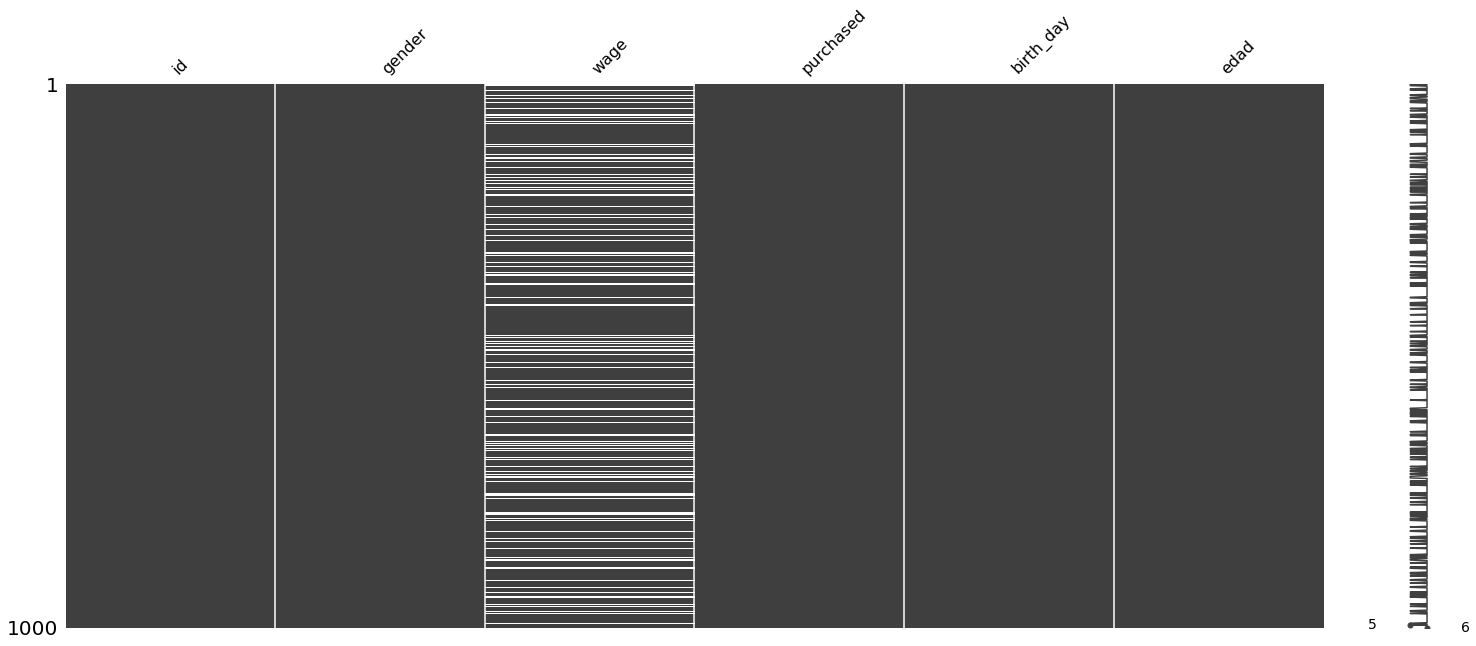

In [336]:
!pip install missingno
import missingno as ms
ms.matrix(data)

In [337]:
pivot=data.pivot_table(index=["purchased","gender"],values="wage",aggfunc="mean")

In [338]:
pivot

wage
purchased gender              
0         Female  64287.815126
          Male    61706.521739
1         Female  87595.930233
          Male    85537.671233

In [339]:
def funcion(row):
  wage=row["wage"]
  gender=row["gender"]
  purchased=row["purchased"]
  if pd.isna(wage):
    return pivot["wage"][purchased][gender]
  return wage

In [340]:
data.apply(funcion, axis=1)

0       64287.815126
1      146500.000000
2       85537.671233
3       64287.815126
4      140500.000000
           ...      
995     22500.000000
996     76500.000000
997    143500.000000
998    148000.000000
999     60500.000000
Length: 1000, dtype: float64

In [341]:
data["wage"]=data.apply(funcion, axis=1)

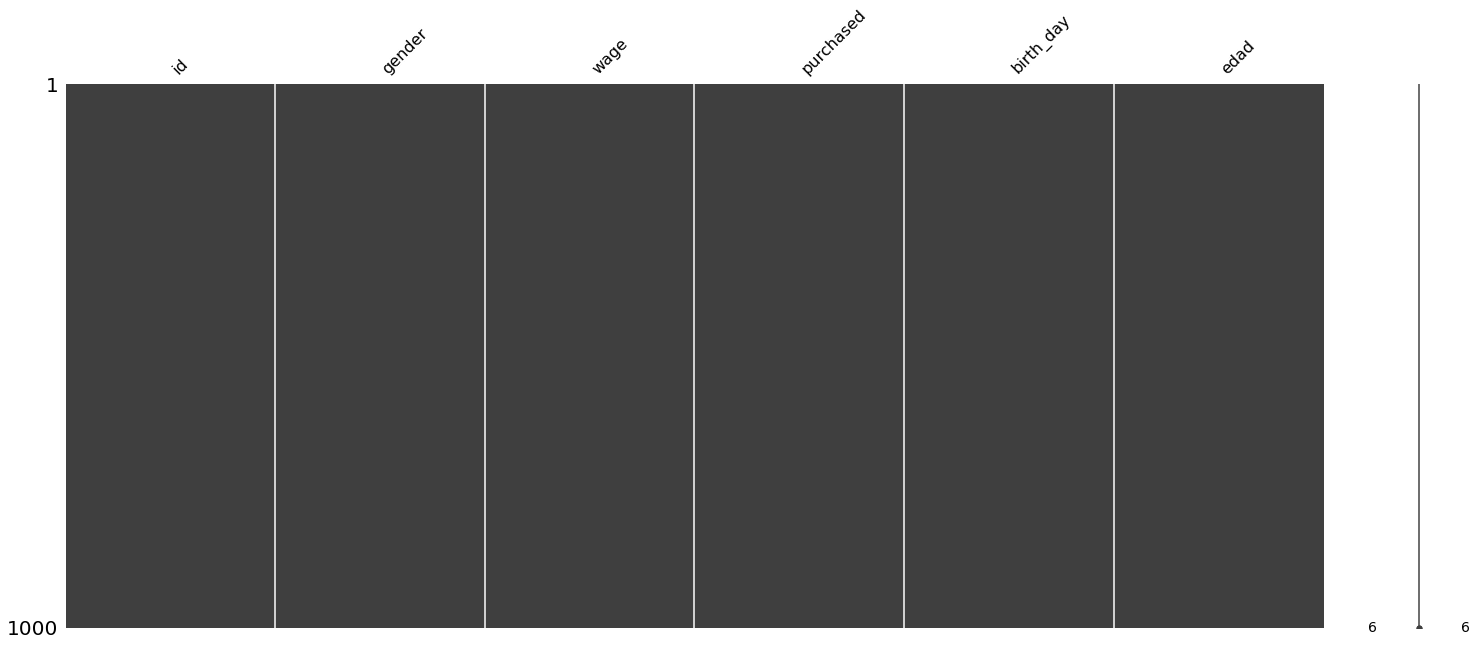

In [342]:
ms.matrix(data)

In [343]:
#Solo se presentaban datos faltantes en la variable salario por lo cual se puede entender que las personas de las cuales se tomó la base de datos tienden a ser más privados con la información respecto a sus ingresos 

# Outliers

In [344]:
#Para wage:
wagef=data['wage']

In [345]:
q1=wagef.quantile(0.25)

In [346]:
q1

53500.0

In [347]:
q3=wagef.quantile(0.75)

In [348]:
rq=q3-q1 #rango intercuartilico

In [349]:
lims=(1.5*rq)+q3 #limite superior

In [350]:
limi=q1-1.5*rq 

In [351]:
w=wagef[(wagef>lims)].index

In [352]:
w

Int64Index([  1,   4,  15,  70,  80,  98, 130, 149, 212, 251, 252, 261, 274,
            345, 347, 360, 415, 513, 517, 518, 546, 587, 589, 599, 643, 666,
            687, 691, 693, 738, 778, 824, 829, 864, 886, 893, 895, 905, 908,
            948, 950, 997, 998],
           dtype='int64')

In [353]:
wagef2=wagef[~wagef.index.isin(w)] 

In [354]:
wagef2.describe()

count       957.000000
mean      69216.288803
std       27209.955061
min       15000.000000
25%       52500.000000
50%       64500.000000
75%       85537.671233
max      138500.000000
Name: wage, dtype: float64

In [355]:
wagef2.mean() - wagef2.median()

4716.288802517185

In [356]:
liminf=max(wagef.min(),limi) #limite inferior

In [357]:
w2=wagef2[(wagef2<liminf)].index

In [358]:
w2

Int64Index([], dtype='int64')

In [359]:
wagef2=wagef2[~wagef2.index.isin(w2)]

In [360]:
wagef2.describe()

count       957.000000
mean      69216.288803
std       27209.955061
min       15000.000000
25%       52500.000000
50%       64500.000000
75%       85537.671233
max      138500.000000
Name: wage, dtype: float64

# Datos inconsistentes

In [361]:
data.describe()

,id,wage,purchased,edad
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,72518.488384,0.402000,39.734000
std,288.819436,30853.955775,0.490547,10.722603
min,1.000000,15000.000000,0.000000,17.000000
25%,250.750000,53500.000000,0.000000,32.000000
50%,500.500000,67500.000000,0.000000,39.000000
75%,750.250000,87595.930233,1.000000,48.000000
max,1000.000000,152500.000000,1.000000,63.000000


In [362]:
data[(data['edad']<18)]

,id,gender,wage,purchased,birth_day,edad
420,717,Male,82000.0,0,2004-11-11,17
569,632,Female,86000.0,0,2004-09-15,17


In [363]:
data[(data['wage']>67500.000000)&(data['edad']<20)]

,id,gender,wage,purchased,birth_day,edad
187,300,Female,68000.0,0,2004-02-28,18
268,617,Male,76000.0,0,2003-02-22,19
269,77,Male,70000.0,0,2003-12-27,18
385,868,Female,87500.0,0,2003-06-02,19
420,717,Male,82000.0,0,2004-11-11,17
487,345,Female,82000.0,0,2002-10-27,19
520,3,Male,74000.0,0,2002-12-09,19
569,632,Female,86000.0,0,2004-09-15,17
578,39,Male,83500.0,0,2003-03-12,19
725,87,Male,85000.0,0,2003-11-20,18


In [364]:
data[(data['wage']>67500.000000)&(data['edad']>60)]

,id,gender,wage,purchased,birth_day,edad
55,440,Male,85500.000000,1,1959-10-20,62
226,880,Male,85537.671233,1,1959-07-15,63
286,431,Male,85537.671233,1,1959-03-01,63
366,323,Male,85537.671233,1,1961-05-05,61
518,647,Male,145500.000000,1,1960-06-22,62
637,535,Male,104500.000000,1,1959-10-10,62
737,412,Female,87595.930233,1,1961-04-18,61
756,18,Male,85537.671233,1,1959-06-19,63
792,805,Male,132500.000000,1,1960-11-05,61
849,456,Female,103500.000000,1,1961-05-24,61


In [365]:
data[(data['wage']<67500.000000)&(data['edad']<20)]

,id,gender,wage,purchased,birth_day,edad
275,36,Male,26500.000000,0,2002-09-19,19
317,207,Male,53500.000000,0,2003-11-29,18
408,666,Female,45500.000000,0,2003-09-02,18
413,174,Male,61706.521739,0,2003-07-30,19
626,713,Female,21000.000000,0,2003-02-07,19
711,976,Female,64287.815126,0,2003-04-15,19
754,511,Female,64287.815126,0,2004-01-05,18
770,563,Female,23000.000000,0,2002-12-17,19
787,156,Male,61706.521739,0,2003-02-01,19
866,580,Male,52000.000000,0,2004-04-05,18


In [366]:
data[(data['wage']<67500.000000)&(data['edad']>60)]

,id,gender,wage,purchased,birth_day,edad
8,753,Female,49500.0,1,1961-08-06,61
131,720,Female,25500.0,1,1961-01-23,61
219,443,Female,48500.0,1,1959-02-05,63
310,615,Male,35500.0,1,1961-06-25,61
694,628,Female,44500.0,0,1960-01-10,62
763,379,Female,31500.0,1,1960-08-08,62


In [367]:
#En la base de datos solo se encuentran dos menores de edad, un hombre y una mujer, los cuales ganan por encima del salario promedio.
#La cantidad de personas menores a 20 años que tienen un salario por encima de la mediana es similar a aquellos menos de 20 que ganan por debajo de la mediana, aun así, ninguno de estos realizó la compra.
#Por el otro lado la cantidad de personas mayores a 60 que poseen un salario por encima de la mediana es mayor a la de aquellos en dicho rango de edad que ganan por debajo de la mediana
#De las seis personas mayores de 60 años que tienen un salario por debajo de la mediana resalta la existencia de una sola persona que no hizo la compra, y también la de un solo hombre.  

# Manejo de memoria

In [368]:
data["edad"]=(data["edad"]).astype("int8")

In [369]:
c = data.select_dtypes('object').columns
for col in c:
  data[c] = data[c].astype('category')

In [370]:
#Las variables category ocupan menos espacio de memoria que las object, al igual que las int8 ocupan menos espacio que las int64

# Clasificación de datos:

In [371]:
#Por grupos etarios
data.groupby("edad")

In [372]:
list(data.groupby("edad"))

[(17,       id  gender     wage  purchased   birth_day  edad
  420  717    Male  82000.0          0  2004-11-11    17
  569  632  Female  86000.0          0  2004-09-15    17),
 (18,       id  gender          wage  purchased   birth_day  edad
  187  300  Female  68000.000000          0  2004-02-28    18
  269   77    Male  70000.000000          0  2003-12-27    18
  317  207    Male  53500.000000          0  2003-11-29    18
  408  666  Female  45500.000000          0  2003-09-02    18
  725   87    Male  85000.000000          0  2003-11-20    18
  754  511  Female  64287.815126          0  2004-01-05    18
  866  580    Male  52000.000000          0  2004-04-05    18),
 (19,       id  gender          wage  purchased   birth_day  edad
  268  617    Male  76000.000000          0  2003-02-22    19
  275   36    Male  26500.000000          0  2002-09-19    19
  385  868  Female  87500.000000          0  2003-06-02    19
  413  174    Male  61706.521739          0  2003-07-30    19
  487  

In [373]:
data.groupby(["edad"]).agg({"edad":["mean","median","min","max","count"]})

edad                     
      mean median min max count
edad                           
17    17.0   17.0  17  17     2
18    18.0   18.0  18  18     7
19    19.0   19.0  19  19    14
20    20.0   20.0  20  20    12
21    21.0   21.0  21  21     9
22    22.0   22.0  22  22    11
23    23.0   23.0  23  23    11
24    24.0   24.0  24  24    16
25    25.0   25.0  25  25    19
26    26.0   26.0  26  26    26
27    27.0   27.0  27  27    27
28    28.0   28.0  28  28    25
29    29.0   29.0  29  29    14
30    30.0   30.0  30  30    24
31    31.0   31.0  31  31    25
32    32.0   32.0  32  32    17
33    33.0   33.0  33  33    17
34    34.0   34.0  34  34    19
35    35.0   35.0  35  35    51
36    36.0   36.0  36  36    37
37    37.0   37.0  37  37    33
38    38.0   38.0  38  38    44
39    39.0   39.0  39  39    43
40    40.0   40.0  40  40    49
41    41.0   41.0  41  41    36
42    42.0   42.0  42  42    40
43    43.0   43.0  43  43    29
44    44.0   44.0  44  44    14
45    45.0   45.0  45  45    23
46    46.0   46.0  46  46    24
47    47.0   47.0  47  47    30
48    48.0   48.0  48  48    33
49    49.0   49.0  49  49    32
50    50.0   50.0  50  50    24
51    51.0   51.0  51  51    12
52    52.0   52.0  52  52    21
53    53.0   53.0  53  53    10
54    54.0   54.0  54  54    13
55    55.0   55.0  55  55    14
56    56.0   56.0  56  56    10
57    57.0   57.0  57  57    12
58    58.0   58.0  58  58    13
59    59.0   59.0  59  59    21
60    60.0   60.0  60  60    16
61    61.0   61.0  61  61     9
62    62.0   62.0  62  62     7
63    63.0   63.0  63  63     5

In [374]:
#Por grupos de ingreso
data.groupby("wage")

In [375]:
list(data.groupby("wage"))

[(15000.0,       id  gender     wage  purchased   birth_day  edad
  414  400    Male  15000.0          0  1992-04-10    30
  817  794  Female  15000.0          0  1991-02-11    31),
 (16000.0,       id gender     wage  purchased   birth_day  edad
  944  225   Male  16000.0          0  1996-02-17    26),
 (16500.0,       id  gender     wage  purchased   birth_day  edad
  28   688    Male  16500.0          0  1995-09-04    26
  75   429  Female  16500.0          0  1995-10-17    26
  156  369  Female  16500.0          0  1990-12-14    31),
 (17000.0,       id  gender     wage  purchased   birth_day  edad
  464   45    Male  17000.0          0  1992-04-01    30
  630  123  Female  17000.0          0  1995-11-14    26
  907  233  Female  17000.0          0  1996-04-17    26),
 (17500.0,       id  gender     wage  purchased   birth_day  edad
  374  714  Female  17500.0          0  2000-09-29    21
  954  259    Male  17500.0          0  1995-02-11    27),
 (18000.0,       id gender     wage

In [376]:
data.groupby(["wage"]).agg({"wage":["mean","median","min","max","count"]})

wage                                    
              mean    median       min       max count
wage                                                  
15000.0    15000.0   15000.0   15000.0   15000.0     2
16000.0    16000.0   16000.0   16000.0   16000.0     1
16500.0    16500.0   16500.0   16500.0   16500.0     3
17000.0    17000.0   17000.0   17000.0   17000.0     3
17500.0    17500.0   17500.0   17500.0   17500.0     2
...            ...       ...       ...       ...   ...
149500.0  149500.0  149500.0  149500.0  149500.0     2
150000.0  150000.0  150000.0  150000.0  150000.0     2
150500.0  150500.0  150500.0  150500.0  150500.0     2
151500.0  151500.0  151500.0  151500.0  151500.0     3
152500.0  152500.0  152500.0  152500.0  152500.0     1

[238 rows x 5 columns]

#  Tablas pivot

In [377]:
#Compras por grupos etarios
data.pivot_table(index=["edad"],
                  values=["purchased"],
                  aggfunc=["count","mean","median","min","max"])

,count,mean,median,min,max
,purchased,purchased,purchased,purchased,purchased
edad,,,,,
17,2,0.000000,0.0,0,0
18,7,0.000000,0.0,0,0
19,14,0.000000,0.0,0,0
20,12,0.000000,0.0,0,0
21,9,0.000000,0.0,0,0
22,11,0.000000,0.0,0,0
23,11,0.000000,0.0,0,0
24,16,0.000000,0.0,0,0


In [378]:
#Compras por grupos de ingreso
data.pivot_table(index=["wage"],
                  values=["purchased"],
                  aggfunc=["count","mean","median","min","max"])

,count,mean,median,min,max
,purchased,purchased,purchased,purchased,purchased
wage,,,,,
15000.0,2,0.0,0.0,0,0
16000.0,1,0.0,0.0,0,0
16500.0,3,0.0,0.0,0,0
17000.0,3,0.0,0.0,0,0
17500.0,2,0.0,0.0,0,0
...,...,...,...,...,...
149500.0,2,1.0,1.0,1,1
150000.0,2,1.0,1.0,1,1


In [379]:
#Compras por género
data.pivot_table(index=["gender"],
                  values=["purchased"],
                  aggfunc=["count","mean","median","min","max"])

,count,mean,median,min,max
,purchased,purchased,purchased,purchased,purchased
gender,,,,,
Female,522,0.423372,0,0,1
Male,478,0.378661,0,0,1


In [380]:
#Compras por grupos etarios, grupos de ingreso y género
data.pivot_table(index=["wage","edad","gender"],
                  values=["purchased"],
                  aggfunc=["count","mean","median","min","max"])

count      mean    median       min       max
                     purchased purchased purchased purchased purchased
wage     edad gender                                                  
15000.0  17   Female         0       NaN       NaN       NaN       NaN
              Male           0       NaN       NaN       NaN       NaN
         18   Female         0       NaN       NaN       NaN       NaN
              Male           0       NaN       NaN       NaN       NaN
         19   Female         0       NaN       NaN       NaN       NaN
...                        ...       ...       ...       ...       ...
152500.0 61   Male           0       NaN       NaN       NaN       NaN
         62   Female         0       NaN       NaN       NaN       NaN
              Male           0       NaN       NaN       NaN       NaN
         63   Female         0       NaN       NaN       NaN       NaN
              Male           0       NaN       NaN       NaN       NaN

[22372 rows x 5 columns]

In [381]:
#Ingreso medio y mediano por grupos etarios
data.pivot_table(index=["edad"],
                  values=["wage"],
                  aggfunc=["mean","median"])

,mean,median
,wage,wage
edad,,
17,84000.000000,84000.000000
18,62612.545018,64287.815126
19,60335.775615,66893.907563
20,62916.194739,67893.907563
21,53674.440791,64287.815126
22,57798.892284,64287.815126
23,52291.501976,55000.000000
24,53132.118880,61706.521739


In [382]:
#Ingreso medio y mediano por género
data.pivot_table(index=["gender"],
                  values=["wage"],
                  aggfunc=["mean","median"])

,mean,median
,wage,wage
gender,,
Female,74155.810219,69500.0
Male,70730.450732,66500.0


In [383]:
#Las personas de mayores edades y con mayores salarios fueron quienes en promedio hicieron la compra en mayor medida,
#se puede entender que el producto no era del interes de los jovenes ya que incluso aquellos con altos salarios decidieron no comprar 
#En este caso se evidencia que tanto el ingreso medio como el mediano es mayor para las mujeres, y también es mayor para las edades de 51 y 55. 